# Budget exploration
is there a relationship between budget and profit? profit margin?

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [15]:
bommoviegross_df = pd.read_csv('data/bom.movie_gross.csv.gz')
imdbtitlebasics_df = pd.read_csv('data/imdb.title.basics.csv.gz')
imdbtitleratings_df = pd.read_csv('data/imdb.title.ratings.csv.gz')
budgets_df = pd.read_csv('data/tn.movie_budgets.csv.gz')

In [16]:
imdbtitlebasics_df['genrelist'] = imdbtitlebasics_df['genres'].map(lambda x: str(x).split(','))
imdbtitlebasics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genrelist
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama","[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama","[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama","[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"


In [17]:
bommoviegross_df.set_index('title', inplace = True)

In [18]:
budgets_lean = budgets_df.drop(columns = ['domestic_gross', 'worldwide_gross'])
budgets_lean.head()

,id,release_date,movie,production_budget
0,1,"Dec 18, 2009",Avatar,"$425,000,000"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000"


In [19]:
moviebudgets_df = bommoviegross_df.join(budgets_lean.set_index('movie'), how = 'inner')
moviebudgets_df.head()

,studio,domestic_gross,foreign_gross,year,id,release_date,production_budget
10 Cloverfield Lane,Par.,72100000.0,38100000,2016,54,"Mar 11, 2016","$5,000,000"
12 Strong,WB,45800000.0,21600000,2018,64,"Jan 19, 2018","$35,000,000"
12 Years a Slave,FoxS,56700000.0,131100000,2013,18,"Oct 18, 2013","$20,000,000"
127 Hours,FoxS,18300000.0,42400000,2010,6,"Nov 5, 2010","$18,000,000"
13 Hours: The Secret Soldiers of Benghazi,Par.,52900000.0,16600000,2016,30,"Jan 15, 2016","$50,000,000"


In [20]:
def moneystr(str):
    no_dollar = str[1:]
    cleanstr = ''
    for i in range(len(no_dollar)):
        if no_dollar[i] != ',':
            cleanstr += no_dollar[i]
    return int(cleanstr)

In [21]:
moviebudgets_df['production_budget'] = moviebudgets_df['production_budget'].map(lambda x: moneystr(x))

In [22]:
moviebudgets_df.head()

,studio,domestic_gross,foreign_gross,year,id,release_date,production_budget
10 Cloverfield Lane,Par.,72100000.0,38100000,2016,54,"Mar 11, 2016",5000000
12 Strong,WB,45800000.0,21600000,2018,64,"Jan 19, 2018",35000000
12 Years a Slave,FoxS,56700000.0,131100000,2013,18,"Oct 18, 2013",20000000
127 Hours,FoxS,18300000.0,42400000,2010,6,"Nov 5, 2010",18000000
13 Hours: The Secret Soldiers of Benghazi,Par.,52900000.0,16600000,2016,30,"Jan 15, 2016",50000000


In [23]:
bommoviegross_df.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [25]:
moviebudgets_df.dropna(subset=['domestic_gross'], inplace=True)

In [26]:
moviebudgets_df.isna().sum()

studio                 1
domestic_gross         0
foreign_gross        161
year                   0
id                     0
release_date           0
production_budget      0
dtype: int64

In [68]:
moviebudgets_df.studio.value_counts().head()

Uni.    117
Fox     110
WB      102
Par.     74
Sony     74
Name: studio, dtype: int64

In [60]:
moviebudgets_df['domestic_profit'] = moviebudgets_df['domestic_gross'] - moviebudgets_df['production_budget']

In [61]:
moviebudgets_df.head()

,studio,domestic_gross,foreign_gross,year,id,release_date,production_budget,domestic_profit,profit_percentage
10 Cloverfield Lane,Par.,72100000.0,38100000,2016,54,"Mar 11, 2016",5000000,67100000.0,1342.000000
12 Strong,WB,45800000.0,21600000,2018,64,"Jan 19, 2018",35000000,10800000.0,30.857143
12 Years a Slave,FoxS,56700000.0,131100000,2013,18,"Oct 18, 2013",20000000,36700000.0,183.500000
127 Hours,FoxS,18300000.0,42400000,2010,6,"Nov 5, 2010",18000000,300000.0,1.666667
13 Hours: The Secret Soldiers of Benghazi,Par.,52900000.0,16600000,2016,30,"Jan 15, 2016",50000000,2900000.0,5.800000


In [62]:
moviebudgets_df['profit_percentage'] = moviebudgets_df['domestic_profit']*100/moviebudgets_df['production_budget']

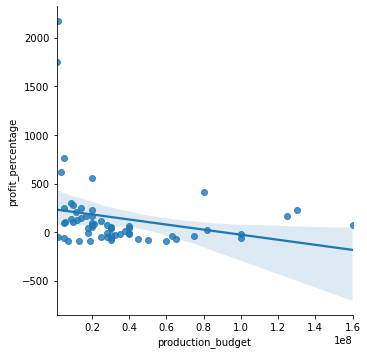

In [66]:
sns.lmplot(x='production_budget', y='profit_percentage', data=moviebudgets_df[moviebudgets_df['studio']=='LGF'])

In [65]:
moviebudgets_df.groupby('studio').sum().sort_values(by='profit_percentage', ascending=False).head()

,domestic_gross,year,id,production_budget,domestic_profit,profit_percentage
studio,,,,,,
WB (NL),3.417700e+09,74524,1795,2148600000,1.269100e+09,29425.550026
Uni.,1.077074e+10,235628,6197,6597700000,4.173038e+09,27934.003952
Par.,6.039100e+09,149021,3840,4770000000,1.269100e+09,19054.471323
LGF,3.332373e+09,122839,3229,2069387650,1.262985e+09,8917.628463
LG/S,1.542400e+09,62441,1805,1658350000,-1.159500e+08,8224.058990


In [73]:
high_output_studios = moviebudgets_df[(moviebudgets_df['studio']=='Uni.')|
                                      (moviebudgets_df['studio']=='Fox')|
                                      (moviebudgets_df['studio']=='WB')]
high_output_studios.head()

,studio,domestic_gross,foreign_gross,year,id,release_date,production_budget,domestic_profit,profit_percentage
12 Strong,WB,45800000.0,21600000,2018,64,"Jan 19, 2018",35000000,10800000.0,30.857143
2 Guns,Uni.,75600000.0,56300000,2013,39,"Aug 2, 2013",61000000,14600000.0,23.934426
47 Ronin,Uni.,38400000.0,113400000,2013,12,"Dec 25, 2013",175000000,-136600000.0,-78.057143
A Good Day to Die Hard,Fox,67300000.0,237300000,2013,34,"Feb 14, 2013",92000000,-24700000.0,-26.847826
A Very Harold & Kumar 3D Christmas,WB,35100000.0,326000,2011,53,"Nov 4, 2011",20000000,15100000.0,75.500000


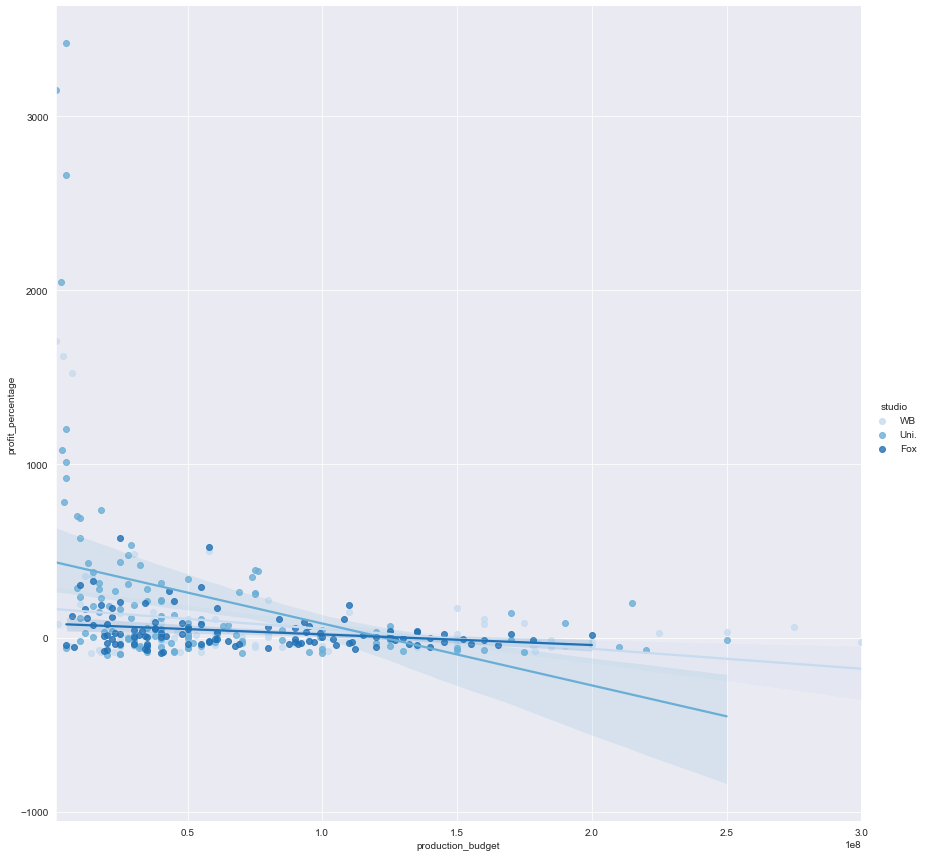

In [86]:
sns.set_style('darkgrid')
sns.lmplot(x='production_budget', y='profit_percentage',
           hue='studio',palette='Blues', height=12, data=high_output_studios);